In [484]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data Cleaning


### Disclaimer

In order to use a different year data, you need to change the year in the code below. The data is available from 2019 to 2023. This is beacause no person in our group had sufficient computing power to run the code for all years.

In [485]:
df = pd.read_csv("data/Valeurs Foncières 2019.txt", sep="|",low_memory=False)

First glance at the data

In [486]:
df.head()

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2019,Vente,...,NaN,1,2.0,Appartement,NaN,20.0,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2019,Vente,...,NaN,2,2.0,Appartement,NaN,62.0,3.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2019,Vente,...,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,08/01/2019,Vente,...,NaN,0,1.0,Maison,NaN,90.0,4.0,S,NaN,940.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2019,Vente,...,NaN,0,1.0,Maison,NaN,101.0,5.0,S,NaN,490.0


Calculating the total of 'Surface carrez'

In [487]:
carrez_columns = ['Surface Carrez du 1er lot','Surface Carrez du 2eme lot','Surface Carrez du 3eme lot','Surface Carrez du 4eme lot','Surface Carrez du 5eme lot']
df[carrez_columns] = df[carrez_columns].replace(',', '.', regex=True).astype(float)
df.loc[:, carrez_columns] = df.loc[:,carrez_columns].fillna(df.loc[:,carrez_columns].mean())
df['Surface Carrez Totale'] = df[carrez_columns].sum(axis=1)
df = df.drop(columns=carrez_columns)

In [488]:
df.head()

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Surface Carrez Totale
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2019,Vente,...,1,2.0,Appartement,NaN,20.0,1.0,NaN,NaN,NaN,334.480349
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2019,Vente,...,2,2.0,Appartement,NaN,62.0,3.0,NaN,NaN,NaN,374.917431
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2019,Vente,...,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN,376.957987
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,08/01/2019,Vente,...,0,1.0,Maison,NaN,90.0,4.0,S,NaN,940.0,376.957987
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2019,Vente,...,0,1.0,Maison,NaN,101.0,5.0,S,NaN,490.0,376.957987


Deleting all columlns when they have more than 70% of missing values

In [489]:
col_meanNA = df.isna().mean()
df_cleaned = df.loc[:, col_meanNA < 0.7]
df_cleaned.loc[:,"Surface terrain"] = df_cleaned.loc[:,"Surface terrain"].fillna(df_cleaned["Surface reelle bati"])
df_cleaned = df_cleaned.apply(lambda col: col.fillna(0) if col.dtype in [np.float64, np.int64] else col.fillna('0'))
df_cleaned = df_cleaned.drop_duplicates()


Transforming the 'price' column into a float

In [490]:
df_cleaned['Valeur fonciere'] = df_cleaned['Valeur fonciere'].str.replace(',', '.').astype(float)

In [491]:
df_cleaned.head()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,...,No plan,1er lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,Surface Carrez Totale
0,1,04/01/2019,Vente,37220.0,26.0,RUE,2730,DE MONTHOLON,1000.0,BOURG-EN-BRESSE,...,298,8,1,2.0,Appartement,20.0,1.0,0,20.0,334.480349
1,1,04/01/2019,Vente,185100.0,22.0,RUE,1650,GEN DELESTRAINT,1000.0,BOURG-EN-BRESSE,...,95,137,2,2.0,Appartement,62.0,3.0,0,62.0,374.917431
2,1,04/01/2019,Vente,185100.0,22.0,RUE,1650,GEN DELESTRAINT,1000.0,BOURG-EN-BRESSE,...,95,7,1,3.0,Dépendance,0.0,0.0,0,0.0,376.957987
3,1,08/01/2019,Vente,209000.0,3.0,RUE,0043,DES CHAMPAGNES,1160.0,PRIAY,...,1676,0,0,1.0,Maison,90.0,4.0,S,940.0,376.957987
4,1,07/01/2019,Vente,134900.0,5.0,LOT,A003,LE BIOLAY,1370.0,SAINT-ETIENNE-DU-BOIS,...,11,0,0,1.0,Maison,101.0,5.0,S,490.0,376.957987


Corsica causes issue as their department code is 2A and 2B. We will change it to 200 and 201 respectively.

In [492]:
df_cleaned.loc[df_cleaned['Code departement'] == '2A', 'Code departement'] = 200
df_cleaned.loc[df_cleaned['Code departement'] == '2B', 'Code departement'] = 201

Changing the date column to a suitable format

In [493]:
df_cleaned['Date mutation'] = pd.to_datetime(df_cleaned['Date mutation'], format='%d/%m/%Y')

Deleting the NaN values in Valeur foncière and surface reelle bati

In [494]:
df_cleaned.dropna(subset=["Valeur fonciere","Surface reelle bati"], inplace = True)

Removing the surface reelle bati and valeur fonciere outliers

In [495]:
# On supprime les lignes où la surface reelle bati est nulle ou la valeur fonciere est nulle
df_cleaned = df_cleaned[df_cleaned['Surface reelle bati']>0]
df_cleaned = df_cleaned[df_cleaned['Valeur fonciere']>0]

In [496]:
df_cleaned.head()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,...,No plan,1er lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,Surface Carrez Totale
0,1,2019-01-04,Vente,37220.0,26.0,RUE,2730,DE MONTHOLON,1000.0,BOURG-EN-BRESSE,...,298,8,1,2.0,Appartement,20.0,1.0,0,20.0,334.480349
1,1,2019-01-04,Vente,185100.0,22.0,RUE,1650,GEN DELESTRAINT,1000.0,BOURG-EN-BRESSE,...,95,137,2,2.0,Appartement,62.0,3.0,0,62.0,374.917431
3,1,2019-01-08,Vente,209000.0,3.0,RUE,0043,DES CHAMPAGNES,1160.0,PRIAY,...,1676,0,0,1.0,Maison,90.0,4.0,S,940.0,376.957987
4,1,2019-01-07,Vente,134900.0,5.0,LOT,A003,LE BIOLAY,1370.0,SAINT-ETIENNE-DU-BOIS,...,11,0,0,1.0,Maison,101.0,5.0,S,490.0,376.957987
5,1,2019-01-03,Vente,192000.0,165.0,ALL,0445,DES LIBELLULES,1340.0,ATTIGNAT,...,94,0,0,1.0,Maison,88.0,4.0,S,708.0,376.957987


Creating a column with the price per square meter

In [497]:
df_cleaned["Prix au m²"] = df_cleaned["Valeur fonciere"] / df_cleaned["Surface reelle bati"]

In [498]:
df_cleaned.head()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,...,1er lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,Surface Carrez Totale,Prix au m²
0,1,2019-01-04,Vente,37220.0,26.0,RUE,2730,DE MONTHOLON,1000.0,BOURG-EN-BRESSE,...,8,1,2.0,Appartement,20.0,1.0,0,20.0,334.480349,1861.000000
1,1,2019-01-04,Vente,185100.0,22.0,RUE,1650,GEN DELESTRAINT,1000.0,BOURG-EN-BRESSE,...,137,2,2.0,Appartement,62.0,3.0,0,62.0,374.917431,2985.483871
3,1,2019-01-08,Vente,209000.0,3.0,RUE,0043,DES CHAMPAGNES,1160.0,PRIAY,...,0,0,1.0,Maison,90.0,4.0,S,940.0,376.957987,2322.222222
4,1,2019-01-07,Vente,134900.0,5.0,LOT,A003,LE BIOLAY,1370.0,SAINT-ETIENNE-DU-BOIS,...,0,0,1.0,Maison,101.0,5.0,S,490.0,376.957987,1335.643564
5,1,2019-01-03,Vente,192000.0,165.0,ALL,0445,DES LIBELLULES,1340.0,ATTIGNAT,...,0,0,1.0,Maison,88.0,4.0,S,708.0,376.957987,2181.818182


In [499]:
df_visu = df_cleaned.copy()
df_cleaned= df_cleaned.drop(columns = ["No disposition", "No voie", "Type de voie", "Code voie", "Voie", "Commune","Nature culture", "1er lot"])

Changing the time format to a count of days

In [500]:
reference_date = pd.Timestamp("2023-01-01")

df_cleaned['Date_numeric'] = (df_cleaned['Date mutation'] - reference_date) // pd.Timedelta('1D')
df_cleaned.drop('Date mutation', axis=1, inplace=True)

Adding a column with the frequency of the transactions

In [501]:
frequency_nature_mutation = df_cleaned['Nature mutation'].value_counts(normalize=True)

df_cleaned['nature_mutation_encoded'] = df_cleaned['Nature mutation'].map(frequency_nature_mutation)
df_cleaned = df_cleaned.drop(columns=["Nature mutation","Type local"])

df_cleaned['Code departement'] = df_cleaned['Code departement'].astype(float)

In [502]:
df_cleaned.head()

,Valeur fonciere,Code postal,Code departement,Code commune,Section,No plan,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Surface Carrez Totale,Prix au m²,Date_numeric,nature_mutation_encoded
0,37220.0,1000.0,1.0,53,AI,298,1,2.0,20.0,1.0,20.0,334.480349,1861.000000,-1458,0.95613
1,185100.0,1000.0,1.0,53,AM,95,2,2.0,62.0,3.0,62.0,374.917431,2985.483871,-1458,0.95613
3,209000.0,1160.0,1.0,314,E,1676,0,1.0,90.0,4.0,940.0,376.957987,2322.222222,-1454,0.95613
4,134900.0,1370.0,1.0,350,AA,11,0,1.0,101.0,5.0,490.0,376.957987,1335.643564,-1455,0.95613
5,192000.0,1340.0,1.0,24,AI,94,0,1.0,88.0,4.0,708.0,376.957987,2181.818182,-1459,0.95613


Changing the encoding of categorical data

In [503]:
lencoder = LabelEncoder()
df_cleaned["Section"] = lencoder.fit_transform(df_cleaned["Section"])
df_cleaned["Section"] = df_cleaned["Section"].astype(float)
df_cleaned = df_cleaned.drop_duplicates()

In [504]:
df_cleaned.head()

,Valeur fonciere,Code postal,Code departement,Code commune,Section,No plan,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Surface Carrez Totale,Prix au m²,Date_numeric,nature_mutation_encoded
0,37220.0,1000.0,1.0,53,10.0,298,1,2.0,20.0,1.0,20.0,334.480349,1861.000000,-1458,0.95613
1,185100.0,1000.0,1.0,53,14.0,95,2,2.0,62.0,3.0,62.0,374.917431,2985.483871,-1458,0.95613
3,209000.0,1160.0,1.0,314,109.0,1676,0,1.0,90.0,4.0,940.0,376.957987,2322.222222,-1454,0.95613
4,134900.0,1370.0,1.0,350,2.0,11,0,1.0,101.0,5.0,490.0,376.957987,1335.643564,-1455,0.95613
5,192000.0,1340.0,1.0,24,10.0,94,0,1.0,88.0,4.0,708.0,376.957987,2181.818182,-1459,0.95613


## Analysis of the cleaned data using box plots

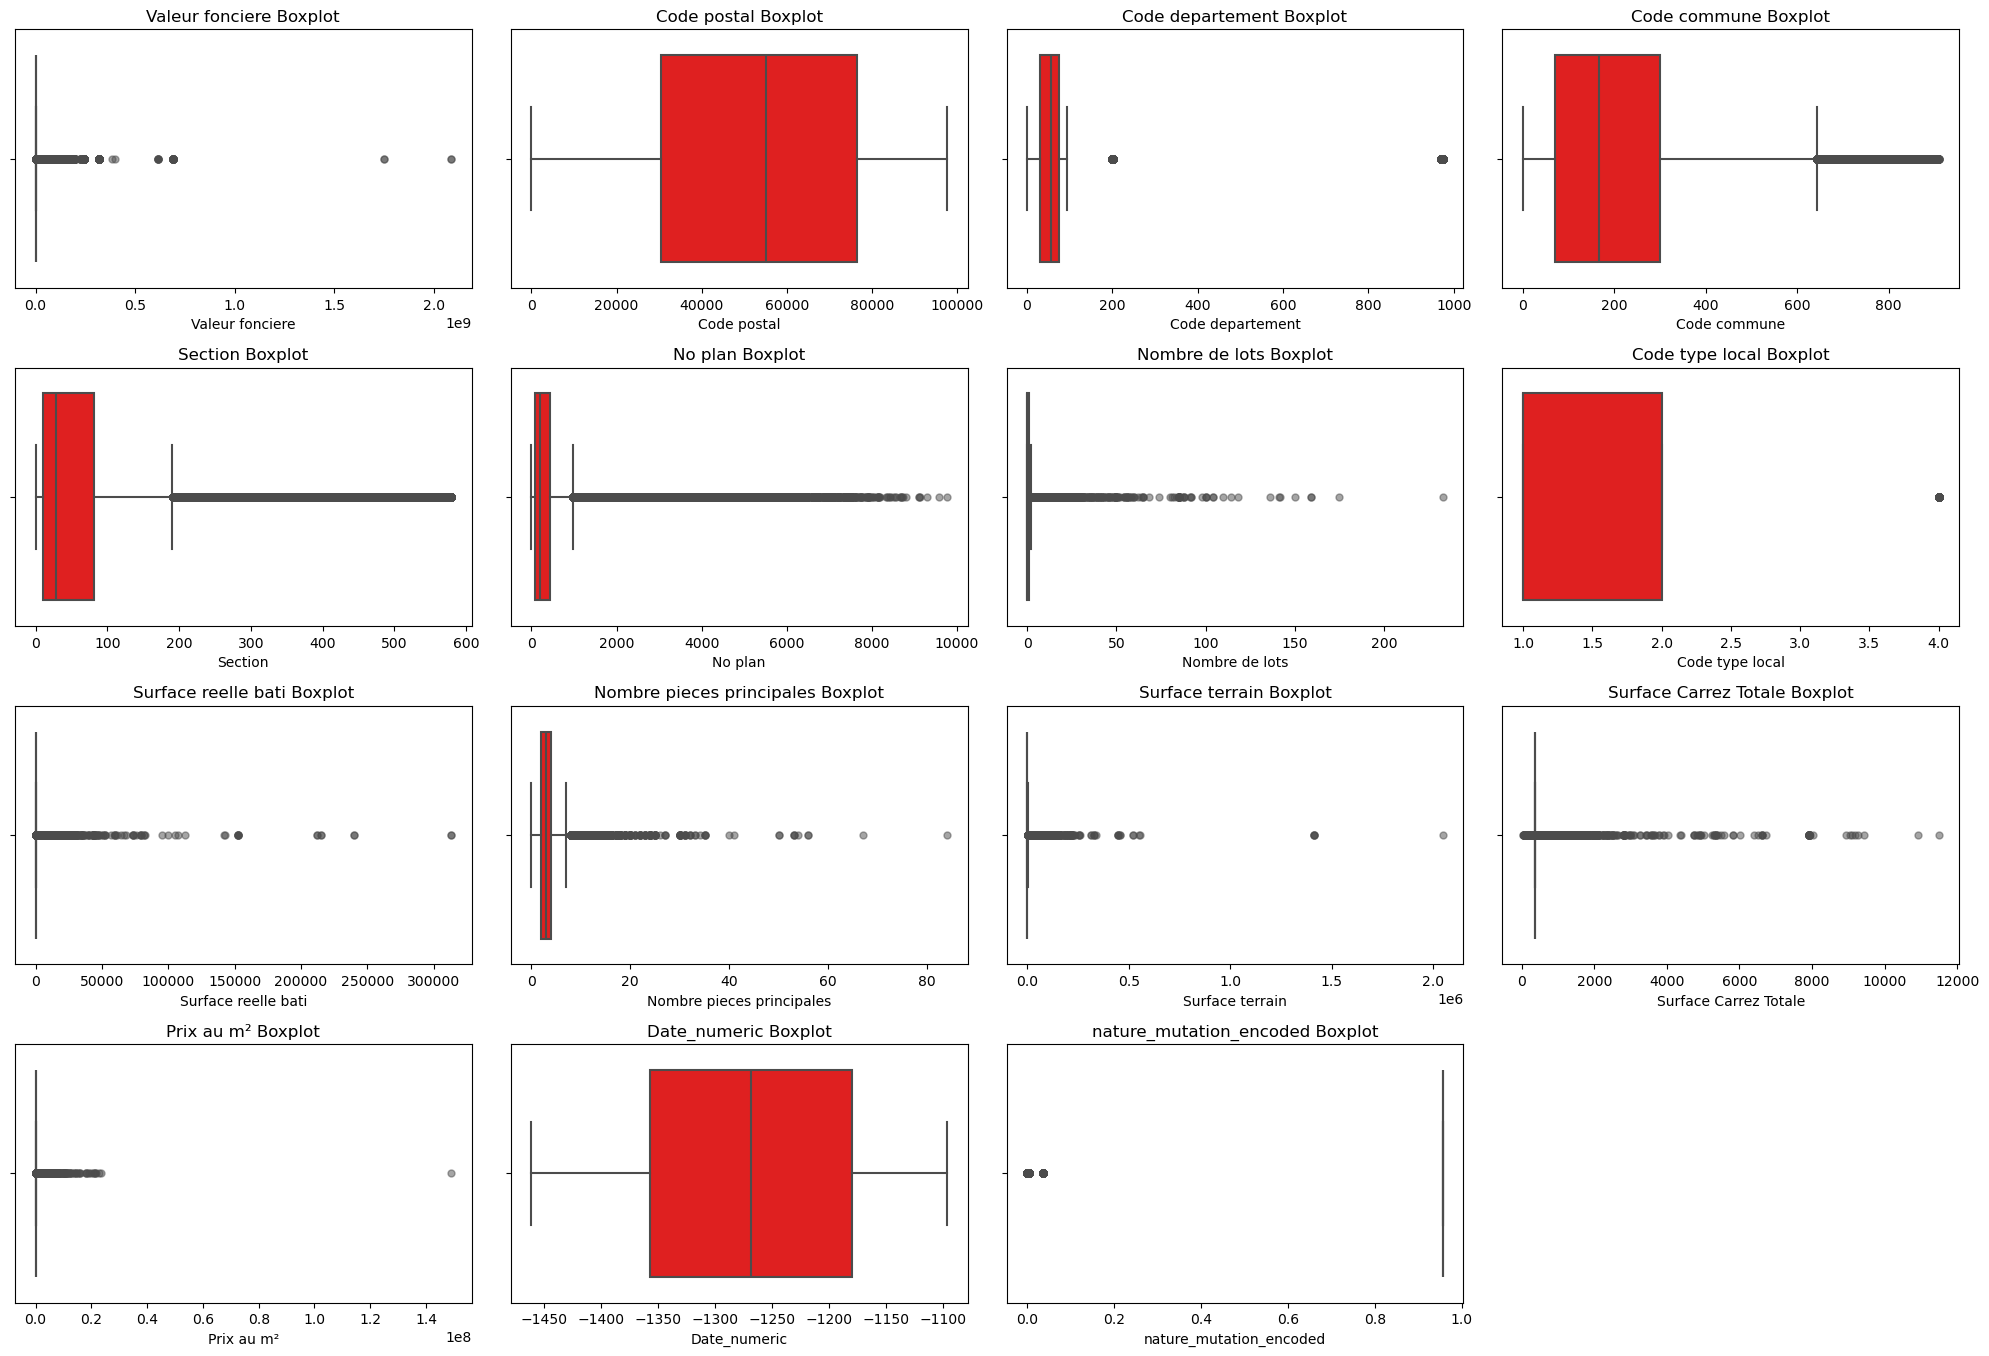

In [505]:
num_columns = len(df_cleaned.columns)
plt.figure(figsize=(20, 20))

# Définir les propriétés de couleurs pour les boxplots
boxprops = dict(color='blue', facecolor='lightblue')
whiskerprops = dict(color='green')
capprops = dict(color='red')
medianprops = dict(color='orange')
flierprops = dict(marker='o', color='purple', alpha=0.5)

for j, col in enumerate(df_cleaned.columns):
    plt.subplot(6, 4, j + 1)
    sns.boxplot(x=df_cleaned[col], color='red', flierprops=flierprops)
    plt.title(f'{col} Boxplot')

plt.tight_layout()
plt.show()

## Analysing the correlation of the data

In [506]:
X = df_cleaned
Y = df_cleaned['Valeur fonciere']

In [507]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

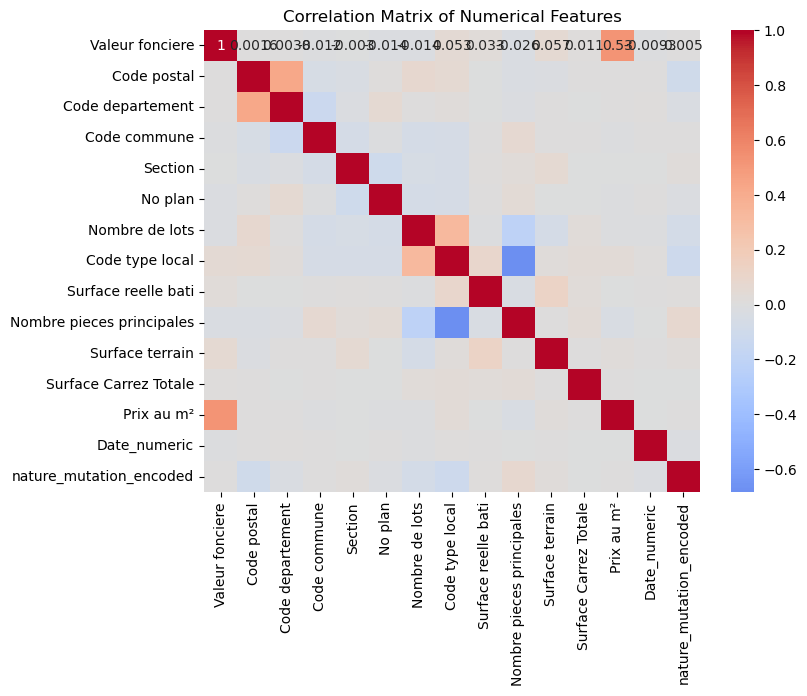

In [508]:
# Calculate the correlation matrix
correlation_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

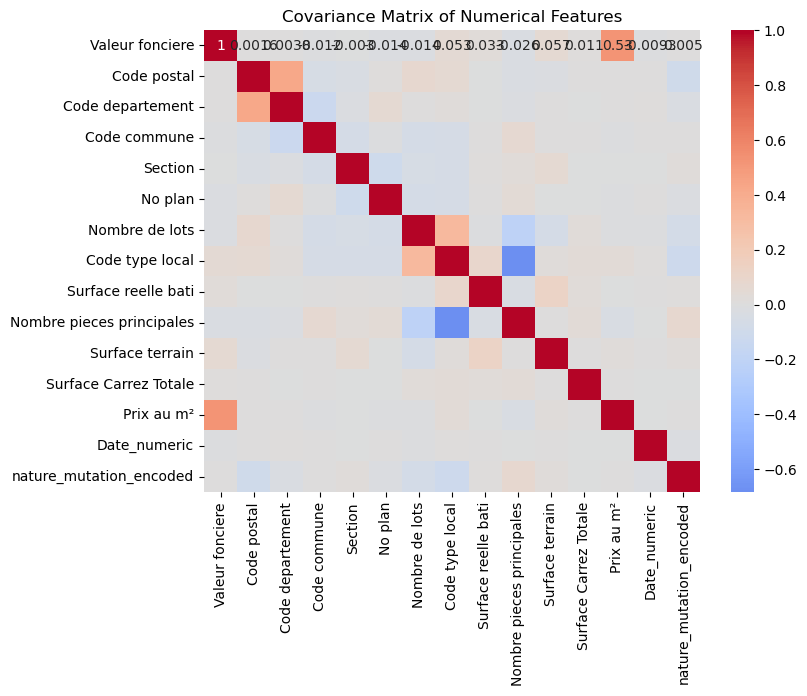

In [509]:
covariance_matrix = pd.DataFrame(X_scaled, columns=X.columns).cov()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Covariance Matrix of Numerical Features')
plt.show()

# KMeans Clustering

In [510]:
taken_columns = ['Valeur fonciere', 'Surface reelle bati', 'Surface terrain', 'Prix au m²']

In [511]:
df_cluster = df_cleaned[taken_columns]

In [512]:
df_cluster.head()

,Valeur fonciere,Surface reelle bati,Surface terrain,Prix au m²
0,37220.0,20.0,20.0,1861.000000
1,185100.0,62.0,62.0,2985.483871
3,209000.0,90.0,940.0,2322.222222
4,134900.0,101.0,490.0,1335.643564
5,192000.0,88.0,708.0,2181.818182


In [513]:
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(df_cluster)

In [514]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(cluster_scaled)
    inertia.append(kmeans.inertia_)

/Users/arthurgatignol/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/arthurgatignol/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/arthurgatignol/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/arthurgatignol/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

## Elbow Method to find the numnber of clusters

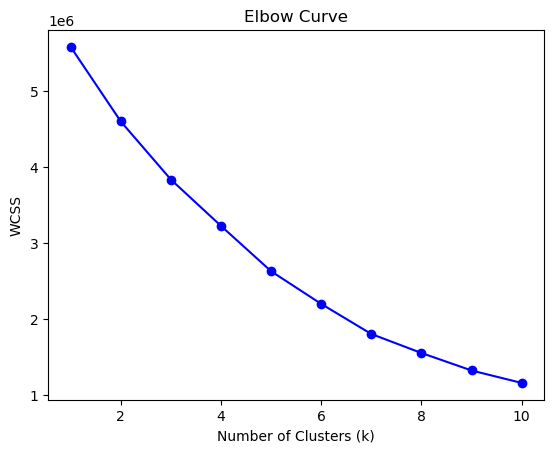

In [515]:
plt.figsize=(16, 12)
plt.plot(range(1, 11), inertia, marker='o', color='blue')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

### PCA

In [516]:
pca = PCA()
pca.fit(cluster_scaled)

# Calculer la variance expliquée
explained_variance = pca.explained_variance_ratio_

In [517]:
n_clusters = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
print(f'Nombre optimal de clusters: {n_clusters}')

Nombre optimal de clusters: 4


In [518]:
# Initialiser le modèle PCA avec le nombre optimal de composantes
pca_optimal = PCA(n_components=4)

# Appliquer PCA et transformer les données
optimal_comps = pca_optimal.fit_transform(cluster_scaled)

### Training the KMeans model

In [519]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(optimal_comps)

/Users/arthurgatignol/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [520]:
df_cleaned['Cluster'] = clusters

In [521]:
df_cleaned.head(150)

,Valeur fonciere,Code postal,Code departement,Code commune,Section,No plan,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Surface Carrez Totale,Prix au m²,Date_numeric,nature_mutation_encoded,Cluster
0,37220.0,1000.0,1.0,53,10.0,298,1,2.0,20.0,1.0,20.0,334.480349,1861.000000,-1458,0.95613,0
1,185100.0,1000.0,1.0,53,14.0,95,2,2.0,62.0,3.0,62.0,374.917431,2985.483871,-1458,0.95613,0
3,209000.0,1160.0,1.0,314,109.0,1676,0,1.0,90.0,4.0,940.0,376.957987,2322.222222,-1454,0.95613,0
4,134900.0,1370.0,1.0,350,2.0,11,0,1.0,101.0,5.0,490.0,376.957987,1335.643564,-1455,0.95613,0
5,192000.0,1340.0,1.0,24,10.0,94,0,1.0,88.0,4.0,708.0,376.957987,2181.818182,-1459,0.95613,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,125000.0,1190.0,1.0,102,1.0,1349,0,1.0,94.0,4.0,56.0,376.957987,1329.787234,-1427,0.95613,0
544,150000.0,1000.0,1.0,53,67.0,16,0,1.0,129.0,4.0,1006.0,376.957987,1162.790698,-1439,0.95613,0
546,227600.0,1960.0,1.0,405,55.0,665,0,1.0,112.0,5.0,187.0,376.957987,2032.142857,-1451,0.95613,0
551,146100.0,1370.0,1.0,426,136.0,292,0,1.0,70.0,3.0,30.0,376.957987,2087.142857,-1445,0.95613,0


## Visual analysis of KMeans clusters

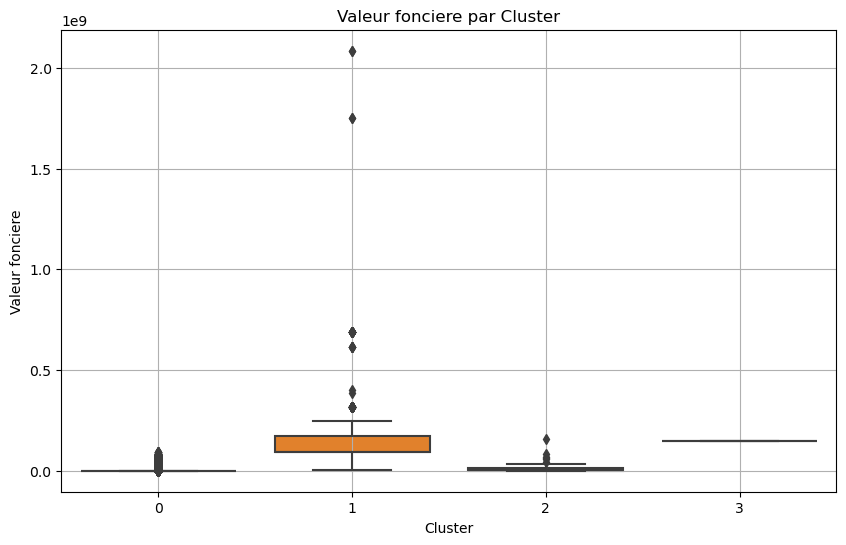

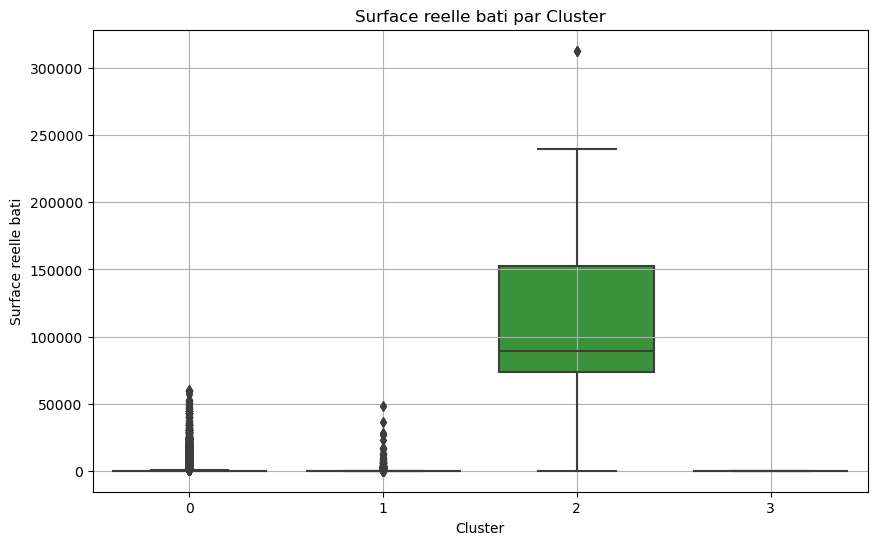

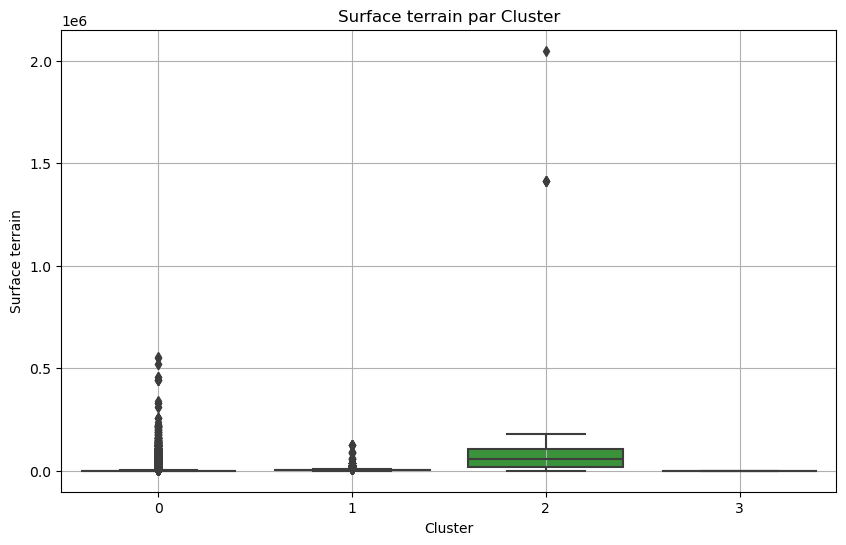

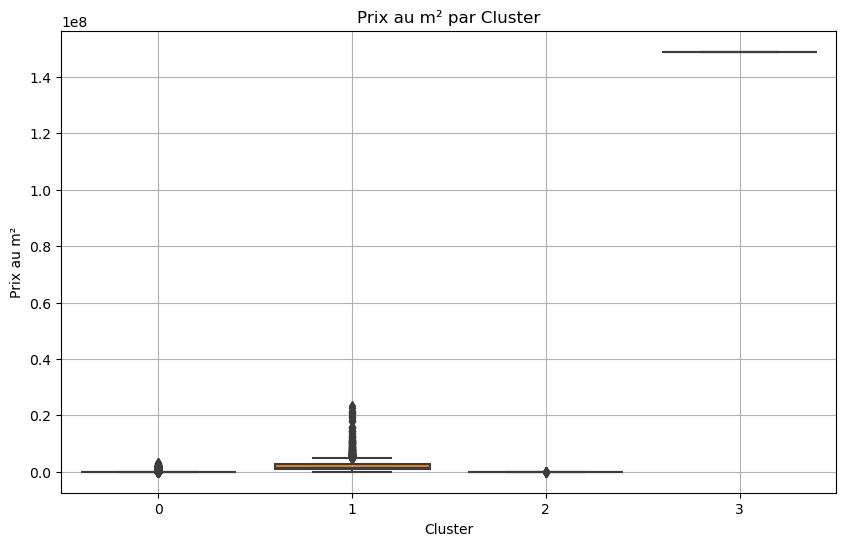

In [522]:
for feature in taken_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=df_cleaned)
    plt.title(f'{feature} par Cluster')
    plt.grid(True)
    plt.show()

In [523]:
for cluster in sorted(df_cleaned['Cluster'].unique()):
    cluster_data = df_cleaned[df_cleaned['Cluster'] == cluster]
    cluster_mean = cluster_data[features].mean()
    print(f"Moyennes des caractéristiques pour le Cluster {cluster}:")
    print(cluster_mean)
    print()

Moyennes des caractéristiques pour le Cluster 0:
Valeur fonciere              543567.501191
Surface reelle bati             113.038478
Surface terrain                 656.804615
Code departement                 63.007186
Nombre pieces principales         3.208867
Code type local                   1.662879
dtype: float64

Moyennes des caractéristiques pour le Cluster 1:
Valeur fonciere              1.300160e+08
Surface reelle bati          3.197984e+02
Surface terrain              3.839549e+03
Code departement             4.659991e+01
Nombre pieces principales    2.534968e+00
Code type local              2.103996e+00
dtype: float64

Moyennes des caractéristiques pour le Cluster 2:
Valeur fonciere              1.595939e+07
Surface reelle bati          1.160880e+05
Surface terrain              2.333869e+05
Code departement             6.707143e+01
Nombre pieces principales    9.523810e-02
Code type local              3.928571e+00
dtype: float64

Moyennes des caractéristiques pour le Clust

# Linear Regression Model

In [524]:
df_cleaned.head()

,Valeur fonciere,Code postal,Code departement,Code commune,Section,No plan,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Surface Carrez Totale,Prix au m²,Date_numeric,nature_mutation_encoded,Cluster
0,37220.0,1000.0,1.0,53,10.0,298,1,2.0,20.0,1.0,20.0,334.480349,1861.000000,-1458,0.95613,0
1,185100.0,1000.0,1.0,53,14.0,95,2,2.0,62.0,3.0,62.0,374.917431,2985.483871,-1458,0.95613,0
3,209000.0,1160.0,1.0,314,109.0,1676,0,1.0,90.0,4.0,940.0,376.957987,2322.222222,-1454,0.95613,0
4,134900.0,1370.0,1.0,350,2.0,11,0,1.0,101.0,5.0,490.0,376.957987,1335.643564,-1455,0.95613,0
5,192000.0,1340.0,1.0,24,10.0,94,0,1.0,88.0,4.0,708.0,376.957987,2181.818182,-1459,0.95613,0


## Linear Regression Model per department

In [525]:
# Simply change the department code to use the desired department
dpt = df_cleaned[(df_cleaned['Code departement'] == 35) & (df_cleaned['Code type local'] == 2)]

In [526]:
mean_dpt_price = dpt['Prix au m²'].mean()

In [527]:
x_feats = ['Surface Carrez Totale', 'Nombre de lots', 'Surface reelle bati',
            'Surface terrain','Code postal', 'Prix au m²','nature_mutation_encoded']

y_label = 'Valeur fonciere'

In [528]:
X = dpt[x_feats]
y = dpt[y_label]
X = X[X['Prix au m²']<30000]
y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [529]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [530]:
# Entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [531]:
# Faire des prédictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [532]:
# Évaluer le modèle
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'Train R^2: {train_r2}')
print(f'Test R^2: {test_r2}')

Train R^2: 0.7415325170935463
Test R^2: 0.7586080241351361


In [533]:
# ['Code postal', 'Nombre de lots', 'Surface reelle bati', 'Nombre pieces principales',
#'Surface terrain','Surface Carrez Totale', 'Prix au m²','nature_mutation_encoded']
new_data = np.array([[13001, 1, 170, 10, 0, mean_dpt_price, 1]])
new_data_scaled = scaler.transform(new_data)
predicted_price = model.predict(new_data_scaled)

print(f'Prix prédit pour l\'appartement: {round(predicted_price[0],2)} euros')

Prix prédit pour l'appartement: 587573.75 euros


/Users/arthurgatignol/miniconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Linear Regression at a national level

In [534]:
x_feats = ['Surface Carrez Totale', 'Nombre de lots', 'Surface reelle bati',
            'Surface terrain','Code postal', 'Prix au m²','nature_mutation_encoded']

y_label = 'Valeur fonciere'

In [535]:
X = df_cleaned[x_feats]
y = df_cleaned[y_label]
X = X[X['Prix au m²']<30000]
y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [536]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [537]:
# Entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [538]:
# Faire des prédictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [539]:
# Évaluer le modèle
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'Train R^2: {train_r2}')
print(f'Test R^2: {test_r2}')

Train R^2: 0.10672434873644732
Test R^2: 0.11494529963358902
